Passed test, plotting ...


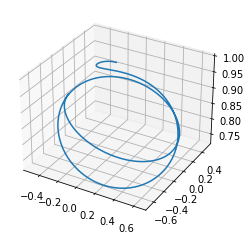

In [2]:
from numpy.testing import assert_almost_equal
import pylie
import numpy as np
import matplotlib.pyplot as plt


def A(t, y):
    return np.array(
        [[0, t, -0.4 * np.cos(t)],
         [-t, 0, 0.1 * t],
         [0.4 * np.cos(t), -0.1 * t, 0]])



y0 = [0.0, 0.0, 1.0]
t_start = 0
t_end = 5
step_length = 0.01
manifold = "hmnsphere"
method = "RKMK4"
solution = pylie.solve(A, y0, t_start, t_end, step_length, manifold, method)

# Verify that the solution is indeed on the unit sphere
solution_norm = [np.linalg.norm(solution[:, i]) for i in range(len(solution.T))]
for val in solution_norm:
    assert_almost_equal(val, 1.0)
print("Passed test, plotting ...")

fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.plot(solution[0, :], solution[1, :], solution[2, :])
plt.show()

Passed test, plotting ...


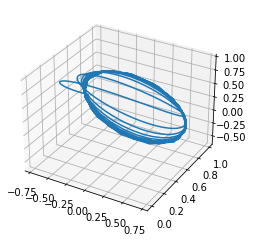

In [8]:
from numpy.testing import assert_almost_equal
import pylie
import numpy as np
import matplotlib.pyplot as plt


def A(t, y):
    return np.array(
        [[t, t, -0.4 * np.exp(t)],
         [-t, t, 0.1 * t],
         [0.4 * np.exp(t), -0.1 * t, 0]])



y0 = [0.0, 0.0, 1.0]
t_start = 0
t_end = 5
step_length = 0.01
manifold = "hmnsphere"
method = "RKMK4"
solution = pylie.solve(A, y0, t_start, t_end, step_length, manifold, method)

# Verify that the solution is indeed on the unit sphere
solution_norm = [np.linalg.norm(solution[:, i]) for i in range(len(solution.T))]
for val in solution_norm:
    assert_almost_equal(val, 1.0)
print("Passed test, plotting ...")

fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.plot(solution[0, :], solution[1, :], solution[2, :])
plt.show()

Passed test, plotting ...


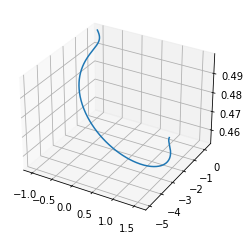

In [3]:
from numpy.testing import assert_almost_equal
import pylie
import numpy as np
import matplotlib.pyplot as plt


def heavy_top(
    t, y, principal_moments=np.array([2, 2, 1]), m=1, g=1, chi=np.array([0, 0, 1])
):
    """A formulation of the problem exploiting the Lie-group structure"""
    mu, beta = np.split(y, 2)
    mu_dot = -mu / principal_moments
    beta_dot = -m * g * chi
    return np.hstack((mu_dot, beta_dot))



y0 = np.array([np.sin(1.1), 0, np.cos(1.1), 1, 0.2, 3])
t_start = 0
t_end = 5
step_length = 0.01
manifold = "heavytop"
method = "RKMK4"
solution = pylie.solve(heavy_top, y0, t_start, t_end, step_length, manifold, method)

# Verify that the solution is indeed on the manifold
expexted_norm = np.linalg.norm(y0[3:])
solution_norm = [np.linalg.norm(solution[3:, i]) for i in range(len(solution.T))]
for val in solution_norm:
    assert_almost_equal(val, expexted_norm)
print("Passed test, plotting ...")

fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.plot(solution[0, :], solution[1, :], solution[2, :])
plt.show()

In [1]:
import sys
!{sys.executable} -m pip install pylie